**Import libraries**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

**Read data**

In [42]:
df=pd.read_csv("/content/drive/MyDrive/hour.csv")
df.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [43]:
#View summary statistics
df.describe()

,index,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Data Exploration and feature prep**

In [44]:
df_prep=df.copy()
df_prep=df_prep.drop(['index','date','casual','registered'],axis=1)
df_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [45]:
#Check for nulls
df_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

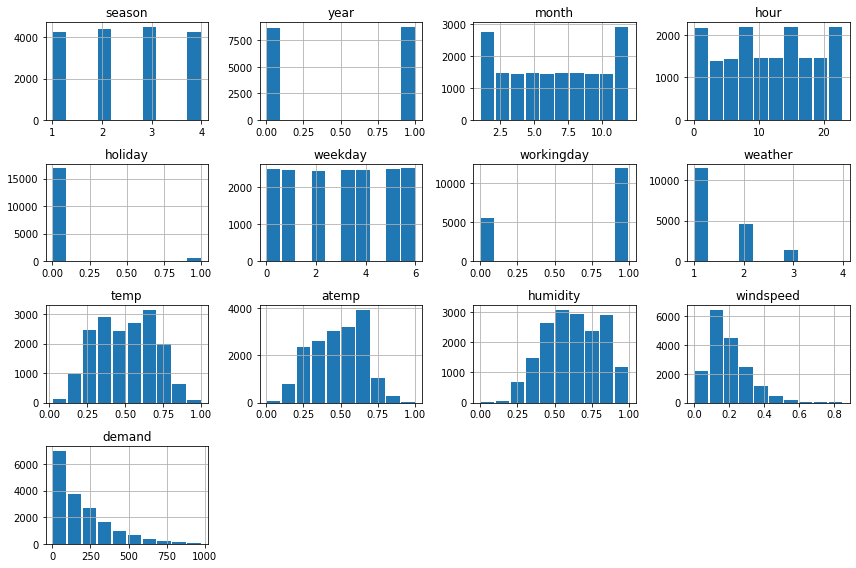

In [46]:
#no nulls found in source, Plot histogram
df_prep.hist(rwidth=0.9,figsize=(12,8))
plt.tight_layout()

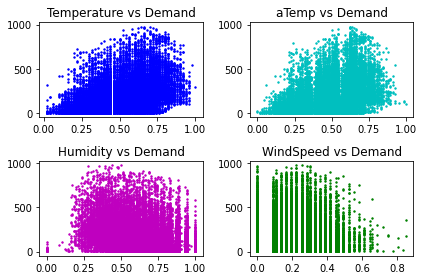

In [47]:
#Plot distribution 
plt.subplot(2,2,1)
plt.title("Temperature vs Demand")
plt.scatter(df_prep['temp'],df_prep['demand'],s=2,c='b')

plt.subplot(2,2,2)
plt.title("aTemp vs Demand")
plt.scatter(df_prep['atemp'],df_prep['demand'],s=2,c='c')

plt.subplot(2,2,3)
plt.title("Humidity vs Demand")
plt.scatter(df_prep['humidity'],df_prep['demand'],s=2,c='m')

plt.subplot(2,2,4)
plt.title("WindSpeed vs Demand")
plt.scatter(df_prep['windspeed'],df_prep['demand'],s=2,c='g')
plt.tight_layout()

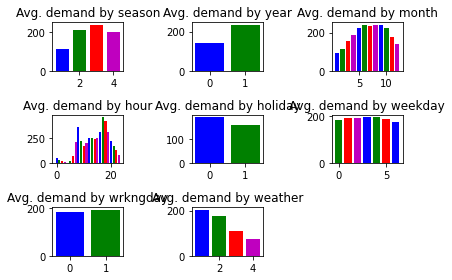

In [48]:
#Plot categorical variables
%matplotlib inline
plt.subplot(3,3,1)
plt.title('Avg. demand by season')
cat_list=df_prep['season'].unique()
cat_avg=df_prep.groupby('season').mean()['demand']
colors=['b','g','r','m']
plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,2)
plt.title('Avg. demand by year')
cat_list=df_prep['year'].unique()
cat_avg=df_prep.groupby('year').mean()['demand']
colors=['b','g','r','m']
plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,3)
plt.title('Avg. demand by month')
cat_list=df_prep['month'].unique()
cat_avg=df_prep.groupby('month').mean()['demand']
colors=['b','g','r','m']
plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,4)
plt.title('Avg. demand by hour')
cat_list=df_prep['hour'].unique()
cat_avg=df_prep.groupby('hour').mean()['demand']
colors=['b','g','r','m']
plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,5)
plt.title('Avg. demand by holiday')
cat_list=df_prep['holiday'].unique()
cat_avg=df_prep.groupby('holiday').mean()['demand']
colors=['b','g','r','m']
plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,6)
plt.title('Avg. demand by weekday')
cat_list=df_prep['weekday'].unique()
cat_avg=df_prep.groupby('weekday').mean()['demand']
colors=['b','g','r','m']
plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,7)
plt.title('Avg. demand by wrkngday')
cat_list=df_prep['workingday'].unique()
cat_avg=df_prep.groupby('workingday').mean()['demand']
colors=['b','g','r','m']
plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,8)
plt.title('Avg. demand by weather')
cat_list=df_prep['weather'].unique()
cat_avg=df_prep.groupby('weather').mean()['demand']
colors=['b','g','r','m']
plt.bar(cat_list,cat_avg,color=colors)

plt.tight_layout()
#weekday,year,workingday can be dropped

<BarContainer object of 24 artists>

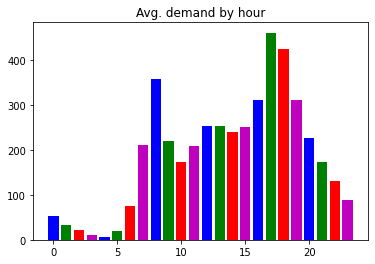

In [49]:
plt.title('Avg. demand by hour')
cat_list=df_prep['hour'].unique()
cat_avg=df_prep.groupby('hour').mean()['demand']
colors=['b','g','r','m']
plt.bar(cat_list,cat_avg,color=colors)

**Summary of EDA**

*   Demand (Target) is not normally distributed
*   Temperature and demand seem to have direct correlation
*   atemp and temp are quite identical
*   humidity and wind speed affect demand, need more analysis
*   Park biked near public transit during morning hours, and near business district during evening hours
*   Demand variation seen across season,month,holiday,hour,weather




**Check for assumptions of multiple Linear Regression**

In [50]:
df_prep.describe()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [51]:
df_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])
# 1% of the time, demand is greater than 782 bikes, 5% of the time the demand is <= 5 bikes

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

#check for multi-collinearity

In [52]:
correlation=df_prep[['temp','atemp','humidity','windspeed','demand']].corr()
correlation.style.background_gradient(cmap='coolwarm')
#can drop atemp,windspeed

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [53]:
df_prep=df_prep.drop(['atemp','windspeed','weekday','workingday'],axis=1)

Check autocorrelation

(array([-24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24]),
 array([0.911732  , 0.86098856, 0.7714863 , 0.700041  , 0.648259  ,
        0.5964064 , 0.5388198 , 0.4916399 , 0.47726613, 0.49328697,
        0.49140733, 0.46724534, 0.45474795, 0.47049642, 0.49622893,
        0.49404147, 0.46796018, 0.47732133, 0.5267586 , 0.59145856,
        0.65201694, 0.7151968 , 0.8059117 , 0.9253113 , 1.        ,
        0.9253113 , 0.8059117 , 0.7151968 , 0.65201694, 0.59145856,
        0.5267586 , 0.47732133, 0.46796018, 0.49404147, 0.49622893,
        0.47049642, 0.45474795, 0.46724534, 0.49140733, 0.49328697,
        0.47726613, 0.4916399 , 0.5388198 , 0.5964064 , 0.648259  ,
        0.700041  , 0.7714863 , 0.86098856, 0.911732  ], dtype=float32),
 <matplotlib.lines.Line2D at 0x7f834

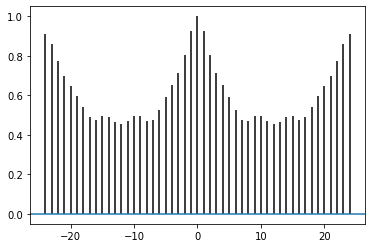

In [54]:
df1=pd.to_numeric(df_prep['demand'],downcast='float')
plt.acorr(df1,maxlags=24)
#High autocorrelation

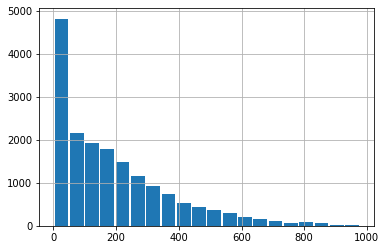

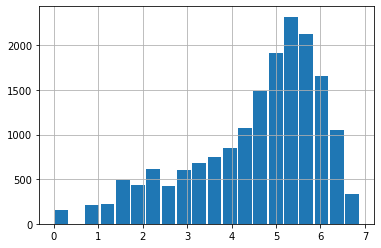

In [55]:
#Demand is not normally distributed, let us convert to log normal and check
df1=df_prep['demand']
df2=np.log(df1)
plt.figure()
df1.hist(rwidth=0.9,bins=20)

plt.figure()
df2.hist(rwidth=0.9,bins=20)
#outliers in lower side, but almost normal when transformed

In [56]:
#Convert to  log tarnsform
df_prep['demand']=np.log(df_prep['demand'])

In [57]:
#Let's handle autocorrelation
t_1=df_prep['demand'].shift(+1).to_frame()
t_1.columns=['t_1']

t_2=df_prep['demand'].shift(+2).to_frame()
t_2.columns=['t_2']

t_3=df_prep['demand'].shift(+3).to_frame()
t_3.columns=['t_3']

df_prep_lag=pd.concat([df_prep,t_1,t_2,t_3],axis=1)
df_prep_lag

,season,year,month,hour,holiday,weather,temp,humidity,demand,t_1,t_2,t_3
0,1,0,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,0,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,0,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,0,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,0,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [58]:
df_prep_lag=df_prep_lag.dropna()
df_prep_lag.shape

(17376, 12)

In [59]:
# Create dummy variables for categorical features season,holiday,weather,month,hour
print(df_prep_lag.dtypes)
df_prep_lag['season']=df_prep_lag['season'].astype('category')
df_prep_lag['holiday']=df_prep_lag['holiday'].astype('category')
df_prep_lag['weather']=df_prep_lag['weather'].astype('category')
df_prep_lag['month']=df_prep_lag['month'].astype('category')
df_prep_lag['hour']=df_prep_lag['hour'].astype('category')

season        int64
year          int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t_1         float64
t_2         float64
t_3         float64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [60]:
print(df_prep_lag.dtypes)

season      category
year           int64
month       category
hour        category
holiday     category
weather     category
temp         float64
humidity     float64
demand       float64
t_1          float64
t_2          float64
t_3          float64
dtype: object


In [61]:
df_prep_lag=pd.get_dummies(df_prep_lag,drop_first=True) #drop first removes the 1st categorical value to avoid multi collinearity
df_prep_lag.head()

,year,temp,humidity,demand,t_1,t_2,t_3,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
df_prep_lag.shape

(17376, 48)

In [63]:
df_prep_lag=df_prep_lag.drop(['year'],axis=1)
df_prep_lag.head()

,temp,humidity,demand,t_1,t_2,t_3,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
#Train test split based on time
X=df_prep_lag.drop(['demand'],axis=1)
y=df_prep_lag['demand']

In [65]:
tr_sz=int(0.7*len(X))
tr_sz

12163

In [66]:
X_train=X.values[0:tr_sz]
X_test=X.values[tr_sz:len(X)]
y_train=y.values[0:tr_sz]
y_test=y.values[tr_sz:len(y)]

Training a Regression Model

In [67]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

score_train=lin_reg.score(X_train,y_train)
score_test=lin_reg.score(X_test,y_test)

#Create predictions
y_pred=lin_reg.predict(X_test)

rmse=math.sqrt(mean_squared_error(y_test,y_pred))
print("Train Score: ",score_train)
print("Test Score: ",score_test)
print("RMSE on test: ",y_pred)

y_test_e=[]
y_pred_e=[]
for i in range(0,len(y_test)):
  y_test_e.append(math.exp(y_test[i]))
  y_pred_e.append(math.exp(y_pred[i]))

#RMSLE
log_sq_sum=0.0
for i in range(0,len(y_test_e)):
  log_actual=math.log(y_test_e[i]+1)  
  log_pred=math.log(y_pred_e[i]+1)  
  log_diff=(log_pred - log_actual)**2
  log_sq_sum=log_sq_sum + log_diff

rmsle =  math.sqrt(log_sq_sum/len(y_test))
print("rmsle: ", rmsle)

Train Score:  0.9195240591465778
Test Score:  0.9287151360253384
RMSE on test:  [3.21001759 2.86500541 3.21845645 ... 4.28217873 4.20477445 3.64981435]
rmsle:  0.3560941706980211
